# NYC Property Sales Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\Newton\Desktop\DA\Python Data\nyc-rolling-sales.csv')

In [4]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [6]:
df.shape

(84548, 22)

# Data Cleaning

### Borough

In [7]:
borough = {1:'Manhattan',2:'Bronx',3:'Brooklyn',4:'Queens',5:'Staten Island'}
df['BOROUGH'] = df['BOROUGH'].map(borough)

### Neighborhood

In [8]:
df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].str.title()

### Building Class Category

In [9]:
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].str.strip(" ")
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].str.title()

### Gross Sqaure Feet & Land Square Feet

In [10]:
df['GROSS SQUARE FEET'].replace(' -  ', np.nan, inplace=True)
df['LAND SQUARE FEET'].replace(' -  ', np.nan, inplace=True) 

### Tax Class At Present 

In [11]:
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].apply(lambda x: x.strip('A').strip('B').strip('C'))

In [12]:
df['TAX CLASS AT PRESENT'].replace(' ', np.nan, inplace=True)

### Sales Price

In [13]:
df['SALE PRICE'].replace(' -  ', np.nan, inplace=True)

### Sales Date

In [14]:
df['SALE DATE']=pd.to_datetime(df['SALE DATE'])

In [15]:
df['SALE MONTH']=df['SALE DATE'].apply(lambda x: x.month)
df['SALE YEAR']=df['SALE DATE'].apply(lambda x: x.year)

In [16]:
df.drop(['SALE DATE'], axis=1, inplace=True)

### Putting variables in correct categories

In [17]:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET", "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [18]:
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    df[col] = df[col].astype("category")

### Dropping Irrelevant  Columns & Duplicates

In [19]:
df.drop(["Unnamed: 0","APARTMENT NUMBER","ADDRESS"] , axis = 1,inplace=True )

In [20]:
df = df.drop_duplicates()

### Dealing with Null values

<AxesSubplot:>

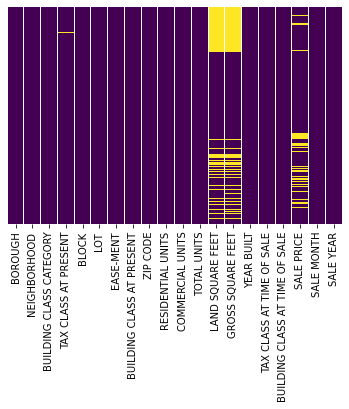

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
#Imputing missing values with averages.
df["LAND SQUARE FEET"] = df.groupby("BOROUGH")["LAND SQUARE FEET"].transform(lambda x: x.fillna(x.mean()))
df["GROSS SQUARE FEET"] = df.groupby("BOROUGH")["GROSS SQUARE FEET"].transform(lambda x: x.fillna(x.mean()))
df["SALE PRICE"] = df.groupby("BOROUGH")["SALE PRICE"].transform(lambda x: x.fillna(x.mean()))

In [23]:
df[["LAND SQUARE FEET", "GROSS SQUARE FEET","SALE PRICE"]] = df[["LAND SQUARE FEET", "GROSS SQUARE FEET","SALE PRICE"]].round()

In [24]:
#Dropping missing few values
df.dropna(inplace=True)

<AxesSubplot:>

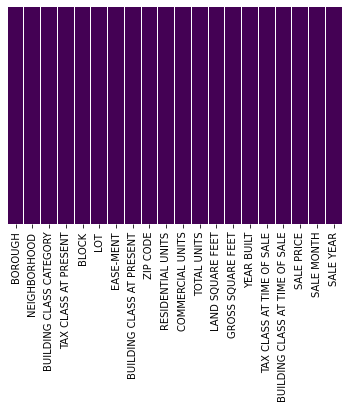

In [25]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Boxplots 

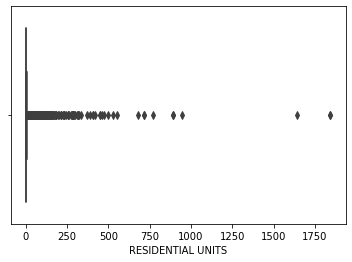

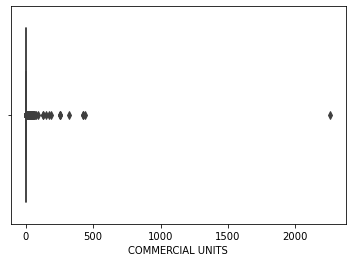

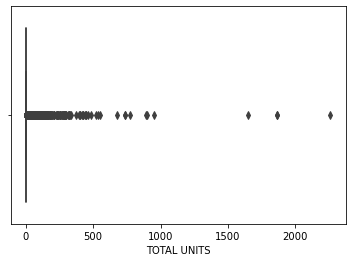

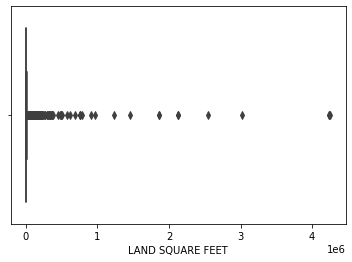

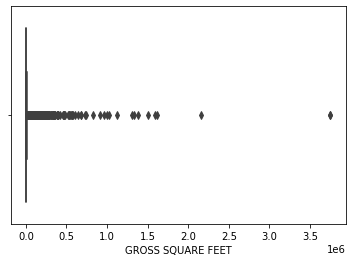

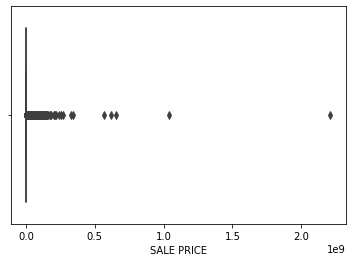

In [26]:
column_list = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET", "GROSS SQUARE FEET","SALE PRICE" ]

for col in column_list:
    sns.boxplot(x = df[col])
    plt.xlabel(col)
    plt.show()

# Data Exploration

## Average sales price by borough

In [27]:
avg_sale = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').mean().sort_values(by= 'SALE PRICE',ascending=False).reset_index()

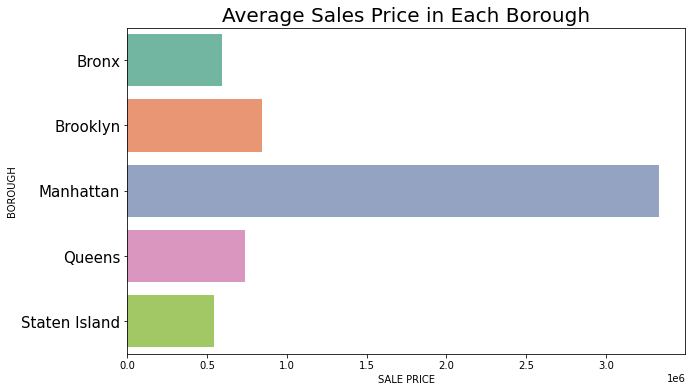

In [28]:
plt.figure(figsize=(10,6))
plt.title("Average Sales Price in Each Borough", fontsize=20)
sns.barplot( x= 'SALE PRICE', y="BOROUGH",  data=avg_sale, palette='Set2')

plt.yticks(fontsize=15)
plt.xticks()
plt.show()


## Top five neighborhoods by total units sold in each borough

In [29]:
def borough(x):
  return df.groupby(['BOROUGH']).get_group(x).groupby('NEIGHBORHOOD').sum()['TOTAL UNITS'].sort_values(ascending=False).head()

In [30]:
nyc = ['Manhattan','Bronx','Brooklyn','Queens', 'Staten Island']

for x in nyc: 
  print(x,borough(x),print(' '))

 
Manhattan NEIGHBORHOOD
Harlem-Central             5421
Upper East Side (59-79)    3060
Harlem-East                2922
Kips Bay                   2840
Midtown West               2475
Name: TOTAL UNITS, dtype: int64 None
 
Bronx NEIGHBORHOOD
Bronxdale                    2833
Soundview                    2112
Melrose/Concourse            2070
Highbridge/Morris Heights    1451
Morrisania/Longwood          1349
Name: TOTAL UNITS, dtype: int64 None
 
Brooklyn NEIGHBORHOOD
Bedford Stuyvesant    3867
Crown Heights         3584
Borough Park          2853
East New York         2287
Bushwick              2228
Name: TOTAL UNITS, dtype: int64 None
 
Queens NEIGHBORHOOD
Flushing-North    4517
Glen Oaks         3806
Astoria           3746
Jamaica           2913
Elmhurst          2110
Name: TOTAL UNITS, dtype: int64 None
 
Staten Island NEIGHBORHOOD
New Springville      931
Great Kills          929
Bulls Head           516
Eltingville          434
West New Brighton    415
Name: TOTAL UNITS, dtype: 

## Residential vs Commerical units by Borough

In [31]:
units = df.groupby('BOROUGH')[['RESIDENTIAL UNITS','COMMERCIAL UNITS']].sum().reset_index()
units

,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS
0,Bronx,23215,1113
1,Brooklyn,47711,3455
2,Manhattan,39643,5058
3,Queens,44591,5048
4,Staten Island,10196,667


## The sum of sales by month

In [32]:
month_sales = df.groupby('SALE MONTH').sum()['SALE PRICE'].reset_index()

<Figure size 576x360 with 0 Axes>

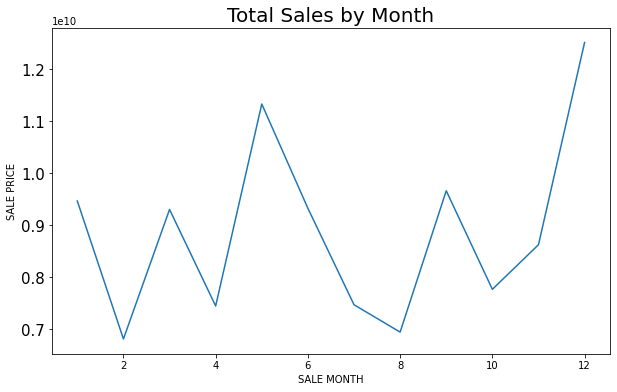

In [33]:
plt.figure(figsize=(8, 5))

plt.figure(figsize=(10,6))
plt.title("Total Sales by Month", fontsize=20)
sns.lineplot( x= 'SALE MONTH', y="SALE PRICE",  data=month_sales, palette='Set2')

plt.yticks(fontsize=15)
plt.show()

## Correlation of variables

<AxesSubplot:>

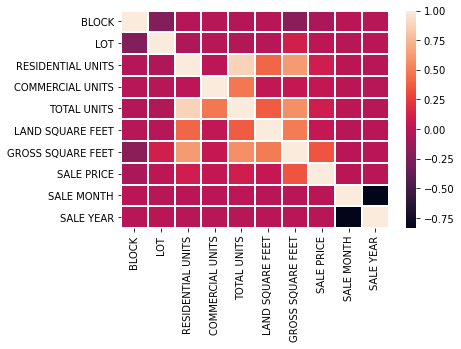

In [34]:
sns.heatmap(df.corr(),lw=1)